In [ ]:
import os

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import grad
from torchvision import transforms
from torchvision import datasets
import torchvision.datasets.utils as dataset_utils
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
def rgb_loader(x):
    x.unsqueeze_(0)
    x = x.repeat(3, 1, 1)
    return x

In [ ]:
T = transforms.Compose([
            transforms.ToTensor(),            
            transforms.Lambda(lambda x: x.repeat(3, 1, 1))                 
            ])

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=T)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=T)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
count_labels_train = dict(Counter(y for (x,y) in mnist_trainset))
count_labels_test = dict(Counter(y for (x,y) in mnist_testset))

In [ ]:
print(count_labels_train)

{5: 5421, 0: 5923, 4: 5842, 1: 6742, 9: 5949, 2: 5958, 3: 6131, 6: 5918, 7: 6265, 8: 5851}


In [ ]:
print(count_labels_test)

{7: 1028, 2: 1032, 1: 1135, 0: 980, 4: 982, 9: 1009, 5: 892, 6: 958, 3: 1010, 8: 974}


In [ ]:
class ColoredMNIST(Dataset):

    def __init__(self):
      self.img = []
      self.label = []
      return
    
    def add_data(self,img_data,label_data):
      self.img.append(img_data)
      self.label.append(label_data)
      
    def __len__(self):
        return len(self.img)

    def __getitem__(self, idx):

        sample = (self.img[idx], self.label[idx])

        return sample

In [ ]:
def draw_color_img(img, color = None):
  img = img.numpy()
  coords = np.argwhere(np.logical_and(np.logical_and(img[0,:,:] > [0.0], img[1,:,:] > [0.0]), img[2,:,:] > [0.0]))
  if color == 'red':
    for i in range(len(coords)):
      img[:,coords[i,0],coords[i,1]] =  [1.0, 0.0, 0.0]
  elif color == 'green':
    for i in range(len(coords)):
      img[:,coords[i,0],coords[i,1]] =  [0.0, 1.0, 0.0]
  elif color == 'blue':
    for i in range(len(coords)):
      img[:,coords[i,0],coords[i,1]] =  [0.0, 0.0, 1.0]
  else:
    for i in range(len(coords)):
      img[:,coords[i,0],coords[i,1]] =  [1.0, 1.0, 0.0]
  img = torch.tensor(img).reshape(3,28,28)
  #plt.imshow(img.permute(1,2,0))
  #plt.show()
  return img

In [ ]:
counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

new_dataset = ColoredMNIST()

for idx, (img, label) in enumerate(mnist_trainset):
  print(counter)
  if(counter[label] < count_labels_train[label]*(25/100)):
    print("RED")
    img = draw_color_img(img, color='red')
  elif(counter[label] < count_labels_train[label]*(50/100)):
    print("GREEN")
    img = draw_color_img(img, color='green')
  elif(counter[label] < count_labels_train[label]*(75/100)):
    print("BLUE")
    img = draw_color_img(img, color='blue')
  else:
    print("YELLOW")
    img = draw_color_img(img, color='yellow')
  counter[label] += 1

  new_dataset.add_data(img, mnist_trainset[idx][1])


Görüntülenen çıkış son 5000 satıra kısaltıldı.
{0: 5678, 1: 6474, 2: 5696, 3: 5866, 4: 5596, 5: 5203, 6: 5671, 7: 5988, 8: 5616, 9: 5712}
YELLOW
{0: 5678, 1: 6474, 2: 5697, 3: 5866, 4: 5596, 5: 5203, 6: 5671, 7: 5988, 8: 5616, 9: 5712}
YELLOW
{0: 5678, 1: 6474, 2: 5697, 3: 5866, 4: 5596, 5: 5203, 6: 5671, 7: 5988, 8: 5617, 9: 5712}
YELLOW
{0: 5678, 1: 6474, 2: 5697, 3: 5866, 4: 5596, 5: 5203, 6: 5671, 7: 5989, 8: 5617, 9: 5712}
YELLOW
{0: 5678, 1: 6474, 2: 5698, 3: 5866, 4: 5596, 5: 5203, 6: 5671, 7: 5989, 8: 5617, 9: 5712}
YELLOW
{0: 5678, 1: 6474, 2: 5698, 3: 5866, 4: 5596, 5: 5203, 6: 5671, 7: 5990, 8: 5617, 9: 5712}
YELLOW
{0: 5678, 1: 6475, 2: 5698, 3: 5866, 4: 5596, 5: 5203, 6: 5671, 7: 5990, 8: 5617, 9: 5712}
YELLOW
{0: 5678, 1: 6475, 2: 5699, 3: 5866, 4: 5596, 5: 5203, 6: 5671, 7: 5990, 8: 5617, 9: 5712}
YELLOW
{0: 5679, 1: 6475, 2: 5699, 3: 5866, 4: 5596, 5: 5203, 6: 5671, 7: 5990, 8: 5617, 9: 5712}
YELLOW
{0: 5679, 1: 6475, 2: 5699, 3: 5866, 4: 5596, 5: 5203, 6: 5672, 7: 5990

In [ ]:
counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

new_test_dataset = ColoredMNIST()

for idx, (img, label) in enumerate(mnist_testset):
  print(counter)
  if(counter[label] < count_labels_test[label]*(25/100)):
    print("RED")
    img = draw_color_img(img, color='red')
  elif(counter[label] < count_labels_test[label]*(50/100)):
    print("GREEN")
    img = draw_color_img(img, color='green')
  elif(counter[label] < count_labels_test[label]*(75/100)):
    print("BLUE")
    img = draw_color_img(img, color='blue')
  else:
    print("YELLOW")
    img = draw_color_img(img, color='yellow')
  counter[label] += 1

  new_test_dataset.add_data(img, mnist_testset[idx][1])


Görüntülenen çıkış son 5000 satıra kısaltıldı.
{0: 719, 1: 849, 2: 784, 3: 755, 4: 749, 5: 676, 6: 706, 7: 762, 8: 731, 9: 769}
YELLOW
{0: 719, 1: 849, 2: 784, 3: 755, 4: 749, 5: 676, 6: 706, 7: 762, 8: 732, 9: 769}
BLUE
{0: 719, 1: 849, 2: 784, 3: 756, 4: 749, 5: 676, 6: 706, 7: 762, 8: 732, 9: 769}
YELLOW
{0: 719, 1: 849, 2: 784, 3: 756, 4: 749, 5: 676, 6: 706, 7: 762, 8: 733, 9: 769}
BLUE
{0: 719, 1: 849, 2: 784, 3: 756, 4: 749, 5: 676, 6: 707, 7: 762, 8: 733, 9: 769}
BLUE
{0: 719, 1: 849, 2: 784, 3: 756, 4: 749, 5: 676, 6: 707, 7: 763, 8: 733, 9: 769}
BLUE
{0: 720, 1: 849, 2: 784, 3: 756, 4: 749, 5: 676, 6: 707, 7: 763, 8: 733, 9: 769}
BLUE
{0: 721, 1: 849, 2: 784, 3: 756, 4: 749, 5: 676, 6: 707, 7: 763, 8: 733, 9: 769}
BLUE
{0: 721, 1: 850, 2: 784, 3: 756, 4: 749, 5: 676, 6: 707, 7: 763, 8: 733, 9: 769}
YELLOW
{0: 721, 1: 850, 2: 785, 3: 756, 4: 749, 5: 676, 6: 707, 7: 763, 8: 733, 9: 769}
BLUE
{0: 721, 1: 850, 2: 785, 3: 757, 4: 749, 5: 676, 6: 707, 7: 763, 8: 733, 9: 769}
YELLOW

In [ ]:
img,label = new_dataset[56000]

In [ ]:
img,label = new_test_dataset[4000]

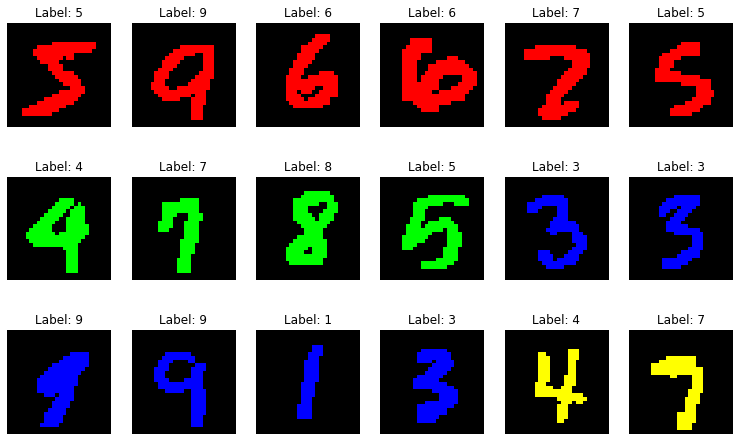

In [ ]:
row = 3
col = 6
fig = plt.figure(figsize=(13, 8))
ax = []

for i in range(row*col):
  ax.append(fig.add_subplot(row, col, i + 1))
  ax[-1].set_title("Label: " + str(new_dataset[i*3000][1]))
  plt.imshow(new_dataset[i*3000][0].permute(1,2,0))
  plt.axis('off')
  
plt.show()


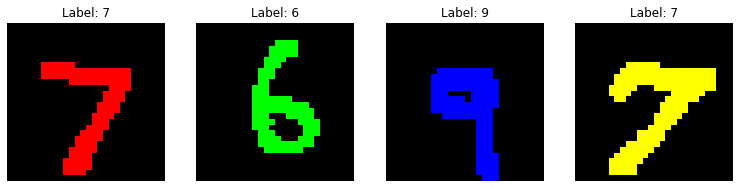

In [ ]:
row = 1
col = 4
fig = plt.figure(figsize=(13, 8))
ax = []

for i in range(row*col):
  ax.append(fig.add_subplot(row, col, i + 1))
  ax[-1].set_title("Label: " + str(new_test_dataset[i*3000][1]))
  plt.imshow(new_test_dataset[i*3000][0].permute(1,2,0))
  plt.axis('off')
  
plt.show()